In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
# This code loads the files into data tables we can work with
trader_df = pd.read_csv('/content/historical_data.csv')
sentiment_df = pd.read_csv('fear_greed_index.csv')

# the first 5 rows of each table to understand what's inside
print("--- TRADER DATA ---")
print(trader_df.head())
print("\n--- SENTIMENT DATA ---")
print(sentiment_df.head())

--- TRADER DATA ---
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL                                   Transaction Hash  \
0         0.0  0

In [4]:
print(trader_df.columns)
print(sentiment_df.columns)

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')
Index(['timestamp', 'value', 'classification', 'date'], dtype='object')


In [5]:
trader_df['trade_date'] = pd.to_datetime(trader_df['Timestamp IST'], errors='coerce').dt.date
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'], errors='coerce').dt.date

# Then merge / filter
merged = trader_df.merge(sentiment_df, left_on='trade_date', right_on='date', how='inner')
print(merged.shape)
merged.head()

(8095, 21)


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Order ID,Crossed,Fee,Trade ID,Timestamp,trade_date,timestamp,value,classification,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,...,5.201771e+10,True,0.345404,8.950000e+14,1.730000e+12,2024-02-12,1707715800,70,Greed,2024-02-12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,...,5.201771e+10,True,0.005600,4.430000e+14,1.730000e+12,2024-02-12,1707715800,70,Greed,2024-02-12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,...,5.201771e+10,True,0.050431,6.600000e+14,1.730000e+12,2024-02-12,1707715800,70,Greed,2024-02-12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,...,5.201771e+10,True,0.050043,1.080000e+15,1.730000e+12,2024-02-12,1707715800,70,Greed,2024-02-12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,...,5.201771e+10,True,0.003055,1.050000e+15,1.730000e+12,2024-02-12,1707715800,70,Greed,2024-02-12


In [6]:
# checking the number of trades with /and without sentiment data
total_trades = len(merged)
matched_sentiment = merged['value'].notna().sum()
unmatched_sentiment = total_trades - matched_sentiment
print(f"Total Trades: {total_trades}")
print(f"Matched Sentiment: {matched_sentiment}")
print(f"Unmatched Sentiment: {unmatched_sentiment}")
merged.head()

Total Trades: 8095
Matched Sentiment: 8095
Unmatched Sentiment: 0


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Order ID,Crossed,Fee,Trade ID,Timestamp,trade_date,timestamp,value,classification,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,...,5.201771e+10,True,0.345404,8.950000e+14,1.730000e+12,2024-02-12,1707715800,70,Greed,2024-02-12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,...,5.201771e+10,True,0.005600,4.430000e+14,1.730000e+12,2024-02-12,1707715800,70,Greed,2024-02-12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,...,5.201771e+10,True,0.050431,6.600000e+14,1.730000e+12,2024-02-12,1707715800,70,Greed,2024-02-12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,...,5.201771e+10,True,0.050043,1.080000e+15,1.730000e+12,2024-02-12,1707715800,70,Greed,2024-02-12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,...,5.201771e+10,True,0.003055,1.050000e+15,1.730000e+12,2024-02-12,1707715800,70,Greed,2024-02-12


In [7]:
 # Convert timestamp to datetime properly
merged['Timestamp IST'] = pd.to_datetime(merged['Timestamp IST'], format='%d-%m-%Y %H:%M', errors='coerce')

# Check if conversion worked
print("Timestamp conversion check:")
print(merged['Timestamp IST'].head(3))
print(f"Missing timestamps: {merged['Timestamp IST'].isnull().sum()}")

# Check the 'value' column - this is likely the Fear & Greed Index
print("\nValue column analysis:")
print(f"Unique values: {merged['value'].unique()}")
print(f"Value range: {merged['value'].min()} to {merged['value'].max()}")
print(f"Missing values: {merged['value'].isnull().sum()}")

# If 'value' has strange values, let's investigate
if merged['value'].nunique() < 10:  # If very few unique values
    print("\nValue value counts:")
    print(merged['value'].value_counts())

Timestamp conversion check:
0   2024-12-02 22:50:00
1   2024-12-02 22:50:00
2   2024-12-02 22:50:00
Name: Timestamp IST, dtype: datetime64[ns]
Missing timestamps: 0

Value column analysis:
Unique values: [70 81 79 25 83 68 20 34 53 60 44 74 33 31 73 15 72 76 26 67 29 49 75 66
 78 71 56 27 41 90 69 84 17 22 50 82 77 64 80 28 40 39 37 32 48]
Value range: 15 to 90
Missing values: 0


In [8]:
# Check for duplicate rows
print("Number of duplicate rows:=", merged.duplicated().sum())

# Drop duplicates if any
df = merged.drop_duplicates()

# Handle missing values - for example, if Closed PnL is missing, we might drop those rows if we're using it as target
# But let's see how many are missing
print("Missing values in Closed PnL=:", merged['Closed PnL'].isnull().sum())

# Since Closed PnL is crucial, we'll drop rows where it's missing if necessary
df = merged.dropna(subset=['Closed PnL'])


Number of duplicate rows:= 0
Missing values in Closed PnL=: 0


In [9]:
# Create time-based features
df['trade_hour'] = pd.to_datetime(merged['trade_date']).dt.hour
df['trade_day_of_week'] = pd.to_datetime(merged['trade_date']).dt.dayofweek  # Monday=0, Sunday=6
df['trade_month'] = pd.to_datetime(merged['trade_date']).dt.month

# Create binary target variable - THIS IS WHAT WE WANT TO PREDICT
df['is_profitable'] = (df['Closed PnL'] > 0).astype(int)

# Check target balance
print("Target variable distribution:")
print(df['is_profitable'].value_counts())
print(f"Percentage profitable: {df['is_profitable'].mean():.2%}")



Target variable distribution:
is_profitable
1    4082
0    4013
Name: count, dtype: int64
Percentage profitable: 50.43%


In [10]:
# Create sentiment-based features
# Assuming 'value' is the sentiment score from the merged dataframe
df['sentiment_score'] = df['value']
df['is_high_greed'] = (df['sentiment_score'] > 70).astype(int) # Example threshold
df['is_high_fear'] = (df['sentiment_score'] < 30).astype(int) # Example threshold

# Encode categorical features
df['Coin_encoded'] = df['Coin'].astype('category').cat.codes
df['Side_encoded'] = df['Side'].astype('category').cat.codes
df['Direction_encoded'] = df['Direction'].astype('category').cat.codes

print("New features created:")
print(df[['sentiment_score', 'is_high_greed', 'is_high_fear', 'Coin_encoded', 'Side_encoded', 'Direction_encoded']].head())

## Define features
features = [
    'Size USD',
    'Fee',
    'trade_hour',
    'trade_day_of_week',
    'trade_month',
    'sentiment_score',
    'is_high_greed',
    'is_high_fear',
    'Coin_encoded',
    'Side_encoded',
    'Direction_encoded'
]

X = df[features]
y = df['is_profitable']

print(f"X shape: {X.shape}, y shape: {y.shape}")

New features created:
   sentiment_score  is_high_greed  is_high_fear  Coin_encoded  Side_encoded  \
0               70              0             0             0             0   
1               70              0             0             0             0   
2               70              0             0             0             0   
3               70              0             0             0             0   
4               70              0             0             0             0   

   Direction_encoded  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
X shape: (8095, 11), y shape: (8095,)


In [11]:
merged.to_csv('merged.csv', index=False)

## **Exploratory Data Analysis (EDA)**

Text(0, 0.5, 'Frequency')

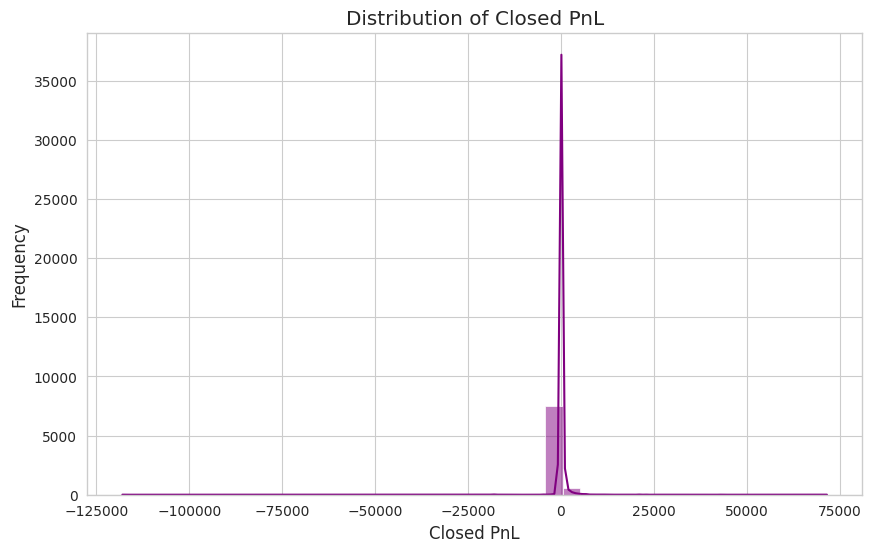

In [12]:
import matplotlib.style as style
style.use('ggplot')
# Set style for plots
sns.set_style("whitegrid")
## distribution of closed PnL
plt.figure(figsize=(10, 6))
sns.histplot(df['Closed PnL'], bins=40, color='purple', kde=True)
plt.title('Distribution of Closed PnL')
plt.xlabel('Closed PnL')
plt.ylabel('Frequency')

In [24]:
plt.savefig('Distribution of Closed PnL.png')

<Figure size 640x480 with 0 Axes>

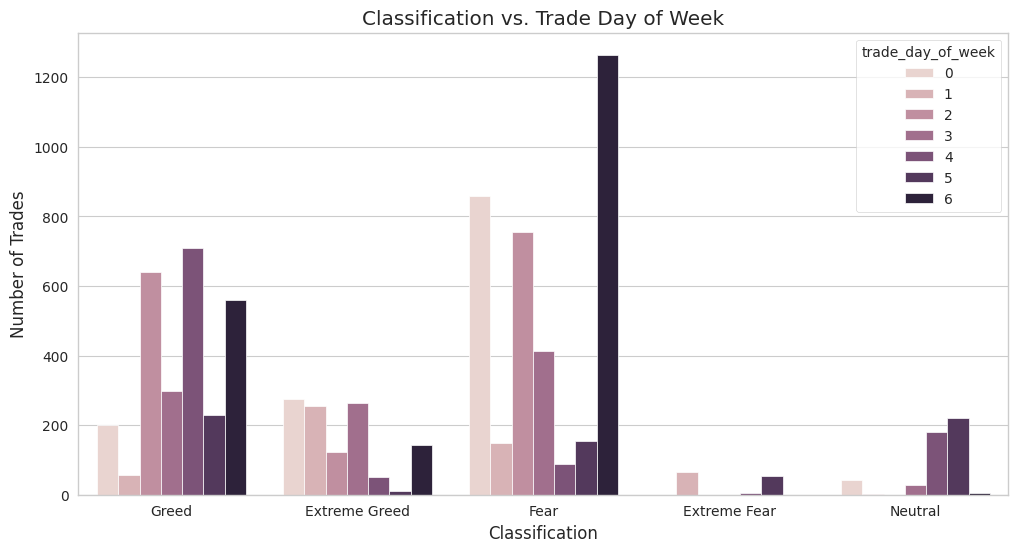

In [13]:
# Plot 2: classification vs. trade_day_of_week
plt.figure(figsize=(12, 6))
sns.countplot(x='classification', hue='trade_day_of_week', data=df)
plt.title('Classification vs. Trade Day of Week')
plt.xlabel('Classification')
plt.ylabel('Number of Trades')
plt.show()

In [23]:
plt.savefig('Classification vs. Trade Day of Week.png')

<Figure size 640x480 with 0 Axes>

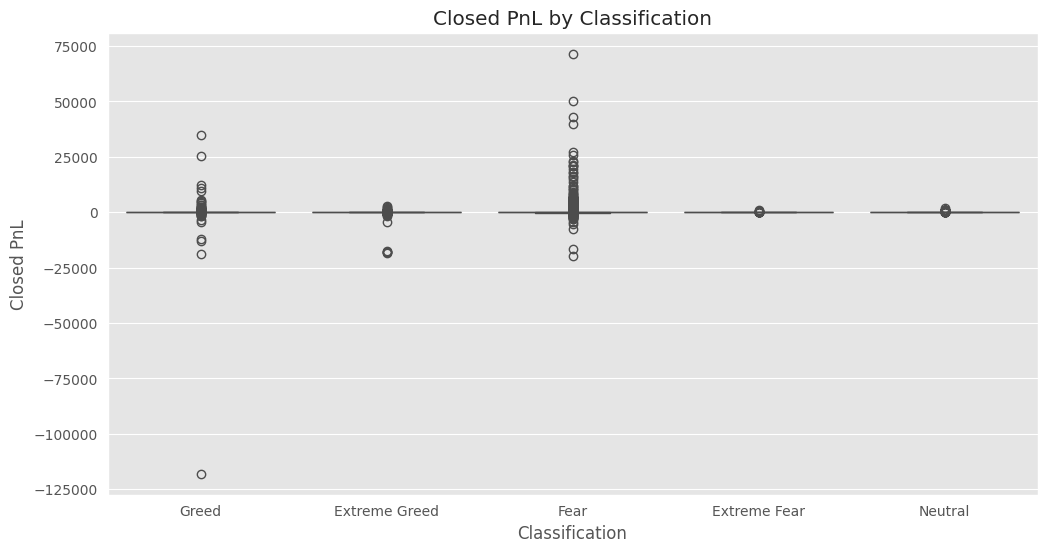

In [14]:
import matplotlib.style as style
style.use('ggplot')
# Sentiment analysis: PnL by classification
plt.figure(figsize=(12, 6))
sns.boxplot(x='classification', y='Closed PnL',color='cyan', data=merged)
plt.title('Closed PnL by Classification')
plt.xlabel('Classification')
plt.ylabel('Closed PnL')
plt.show()

In [22]:
plt.savefig('Closed PnL by Classification.png')

<Figure size 640x480 with 0 Axes>

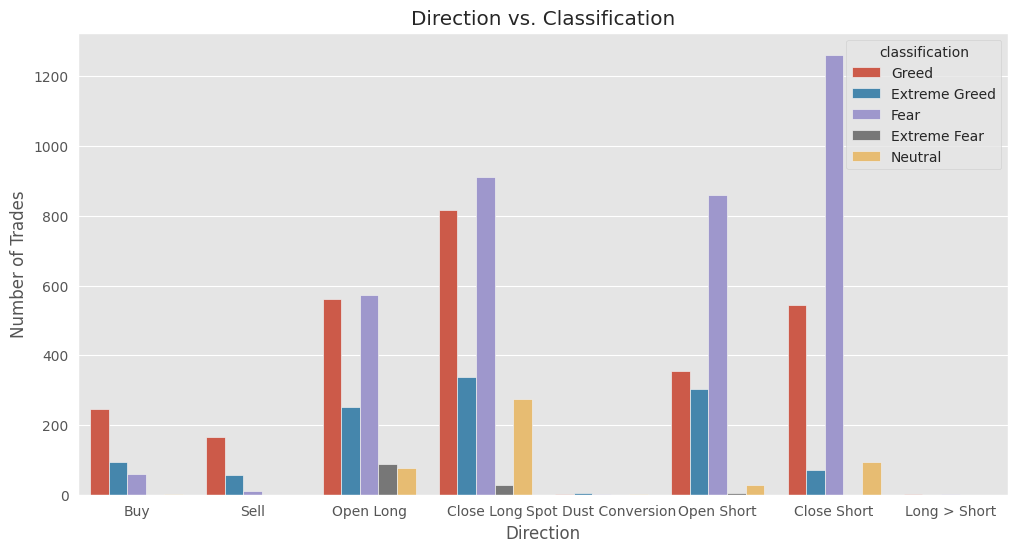

In [15]:
##direction vs. classification
plt.figure(figsize=(12, 6))
sns.countplot(x='Direction', hue='classification', data=df)
plt.title('Direction vs. Classification')
plt.xlabel('Direction')
plt.ylabel('Number of Trades')
plt.show()

In [21]:
plt.savefig('Direction vs. Classification.png')

<Figure size 640x480 with 0 Axes>

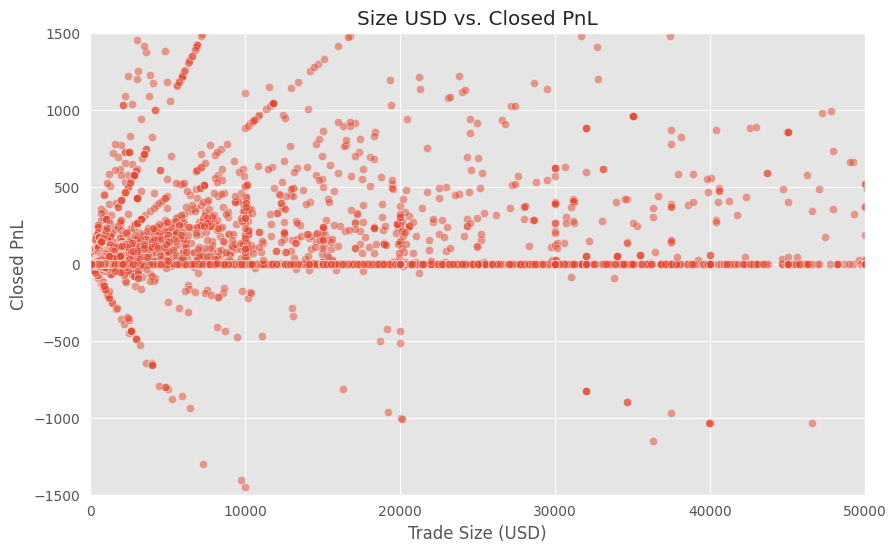

In [16]:
#Trade size vs. PnL
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Size USD', y='Closed PnL', data=df, alpha=0.5)
plt.title('Size USD vs. Closed PnL')
plt.xlabel('Trade Size (USD)')
plt.ylabel('Closed PnL')
plt.xlim(0, 50000)  # Adjust if needed
plt.ylim(-1500, 1500)
plt.show()


In [20]:
plt.savefig('Size USD vs. Closed PnL.png')

<Figure size 640x480 with 0 Axes>

# Machine Learning Model

In [17]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (6476, 11)
X_test shape: (1619, 11)
y_train shape: (6476,)
y_test shape: (1619,)


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       803
           1       0.97      0.99      0.98       816

    accuracy                           0.98      1619
   macro avg       0.98      0.98      0.98      1619
weighted avg       0.98      0.98      0.98      1619

Confusion Matrix:
[[782  21]
 [ 10 806]]
ROC-AUC Score: 0.9964837740824848

Feature Importance:
              feature  importance
10  Direction_encoded    0.563523
8        Coin_encoded    0.177190
1                 Fee    0.067886
0            Size USD    0.048139
5     sentiment_score    0.046123
4         trade_month    0.035911
3   trade_day_of_week    0.031561
9        Side_encoded    0.018624
7        is_high_fear    0.006022
6       is_high_greed    0.005022
2          trade_hour    0.000000


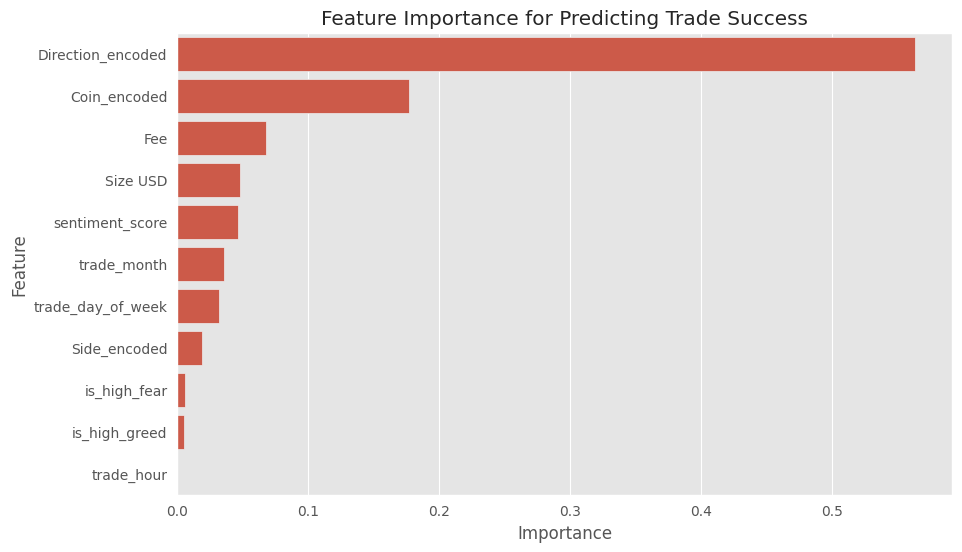

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature',data=feature_importance)
plt.title('Feature Importance for Predicting Trade Success')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [19]:
plt.savefig('Feature Importance for Predicting Trade Success.png')

<Figure size 640x480 with 0 Axes>

 **Prediction:** To predict the outcome of a trade before it's placed. The model can answer: "Based on all past data, what is the probability that this proposed trade will be profitable?"

**Understanding (Insight):** To understand what factors actually drive profitability. The Feature Importance output tells us what the most predictive factors are (e.g., market sentiment, trade size, time of day, specific coin). This is invaluable knowledge for a trader.

**Automation:** The ultimate goal is to use these models to inform or even automate trading decisions, creating a systematic, data-driven strategy that removes emotional and biased decision-making.